In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,recall_score,f1_score

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv(r'C:\Users\sarao\Downloads\diabetes.csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Explore data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.duplicated().sum()

0

Analysis

In [10]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

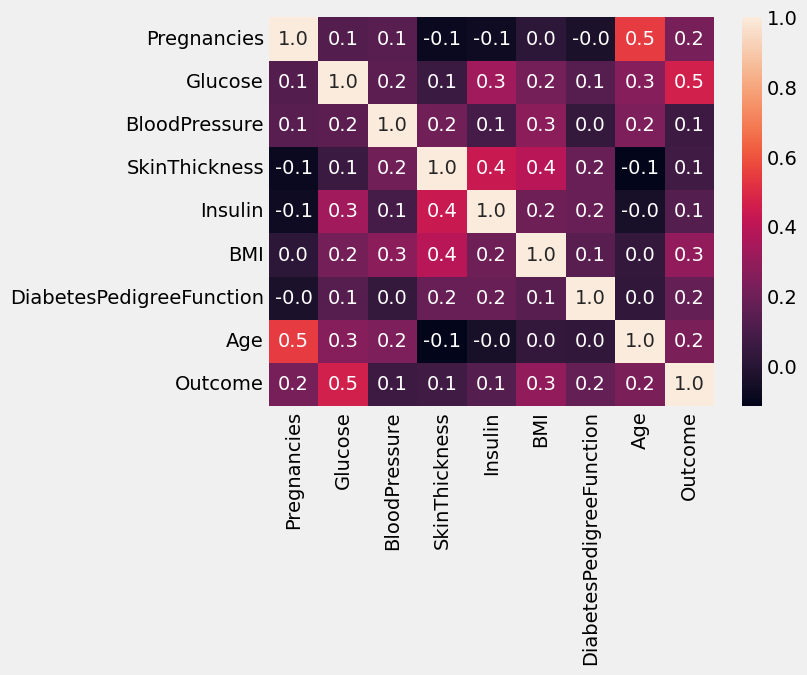

In [13]:
sns.heatmap(data.corr(),annot=True,fmt='0.1f')

<Axes: xlabel='Outcome', ylabel='count'>

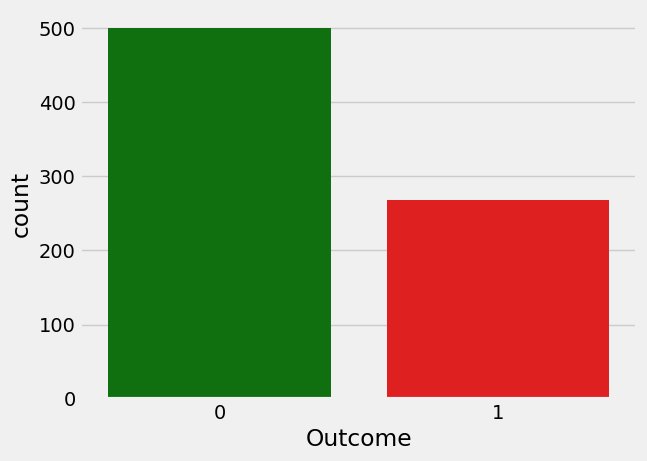

In [15]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

In [16]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

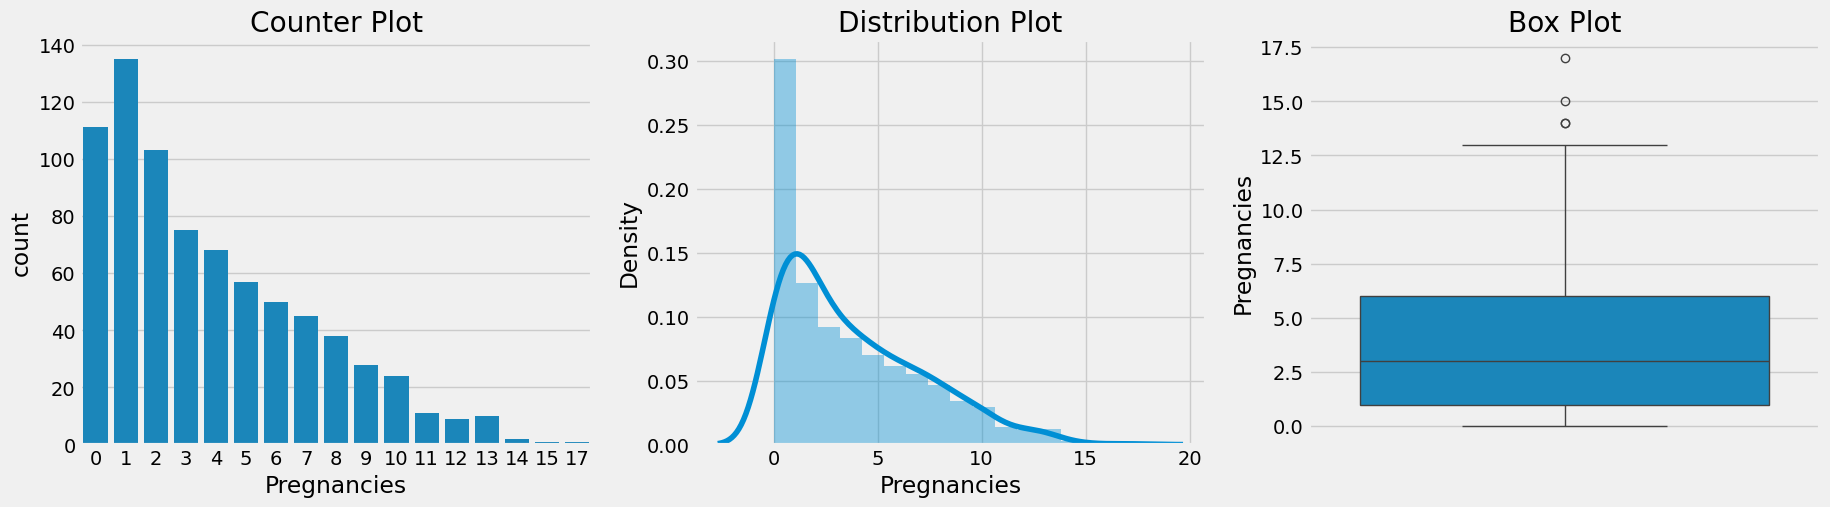

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data['Pregnancies'])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])


plt.show()

<Axes: ylabel='Age'>

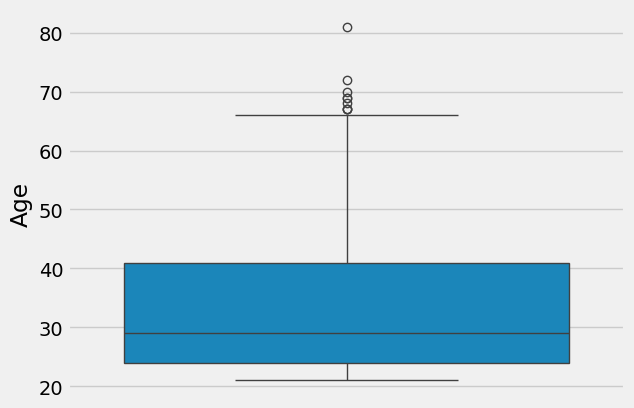

In [19]:
sns.boxplot(data.Age)

Create model

In [20]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [32]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

In [33]:
def cal(model):
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre,y_test)
    f1=f1_score(pre,y_test)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)
    
    sns.heatmap(confusion_matrix(pre,y_test),annot=True)
    print(model)
    print('accuracy is: ',accuracy,'recall is: ',recall,'f1 score is: ', f1)

LogisticRegression()
accuracy is:  0.7662337662337663 recall is:  0.7435897435897436 f1 score is:  0.6170212765957447


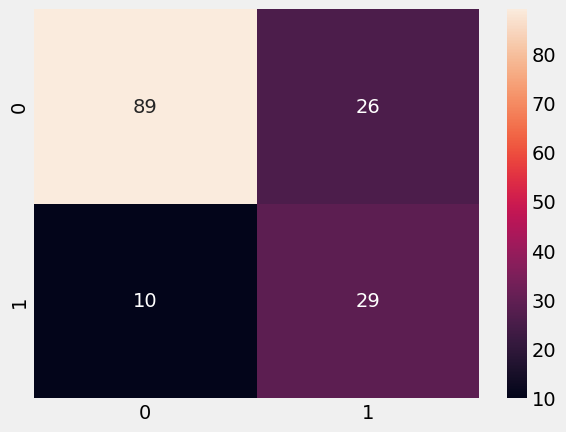

In [34]:
cal(model1)

SVC()
accuracy is:  0.7532467532467533 recall is:  0.7575757575757576 f1 score is:  0.5681818181818182


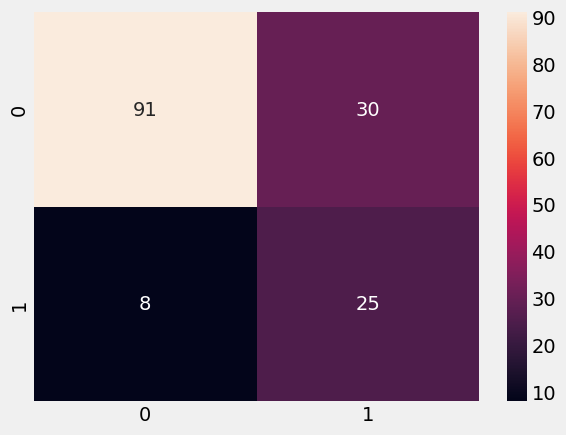

In [35]:
cal(model2)

RandomForestClassifier()
accuracy is:  0.7662337662337663 recall is:  0.6862745098039216 f1 score is:  0.660377358490566


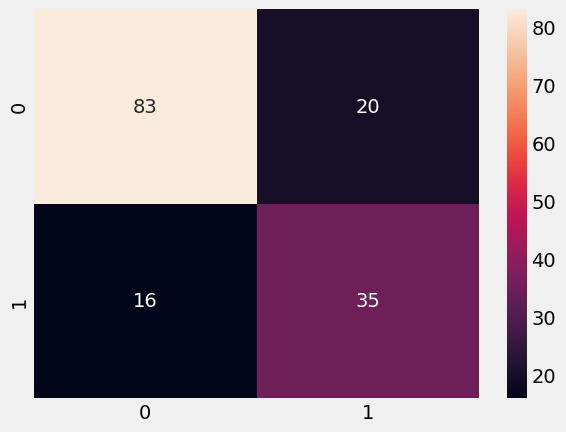

In [36]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is:  0.7792207792207793 recall is:  0.6909090909090909 f1 score is:  0.6909090909090909


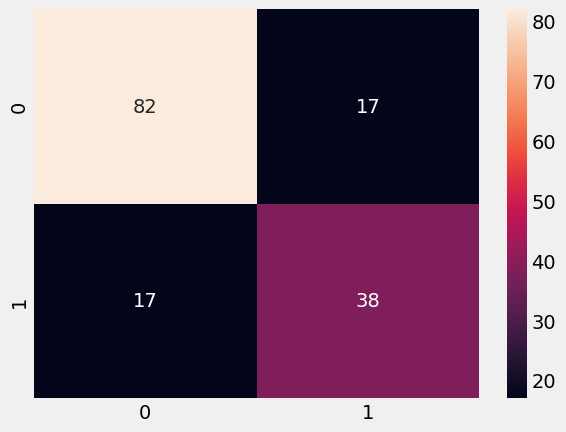

In [37]:
cal(model4)

In [38]:
pd.DataFrame({'Algorithm:':columns,'Accuracy:':result1,'Recall:':result2,'F1_Score:':result3})

,Algorithm:,Accuracy:,Recall:,F1_Score:
0,LogisticRegression,0.766234,0.743590,0.617021
1,SVC,0.753247,0.757576,0.568182
2,RandomForestClassifier,0.766234,0.686275,0.660377
3,GradientBoostingClassifier,0.779221,0.690909,0.690909


In [39]:
FinalResult=pd.DataFrame({'Algorithm:':columns,'Accuracy:':result1,'Recall:':result2,'F1_Score:':result3})

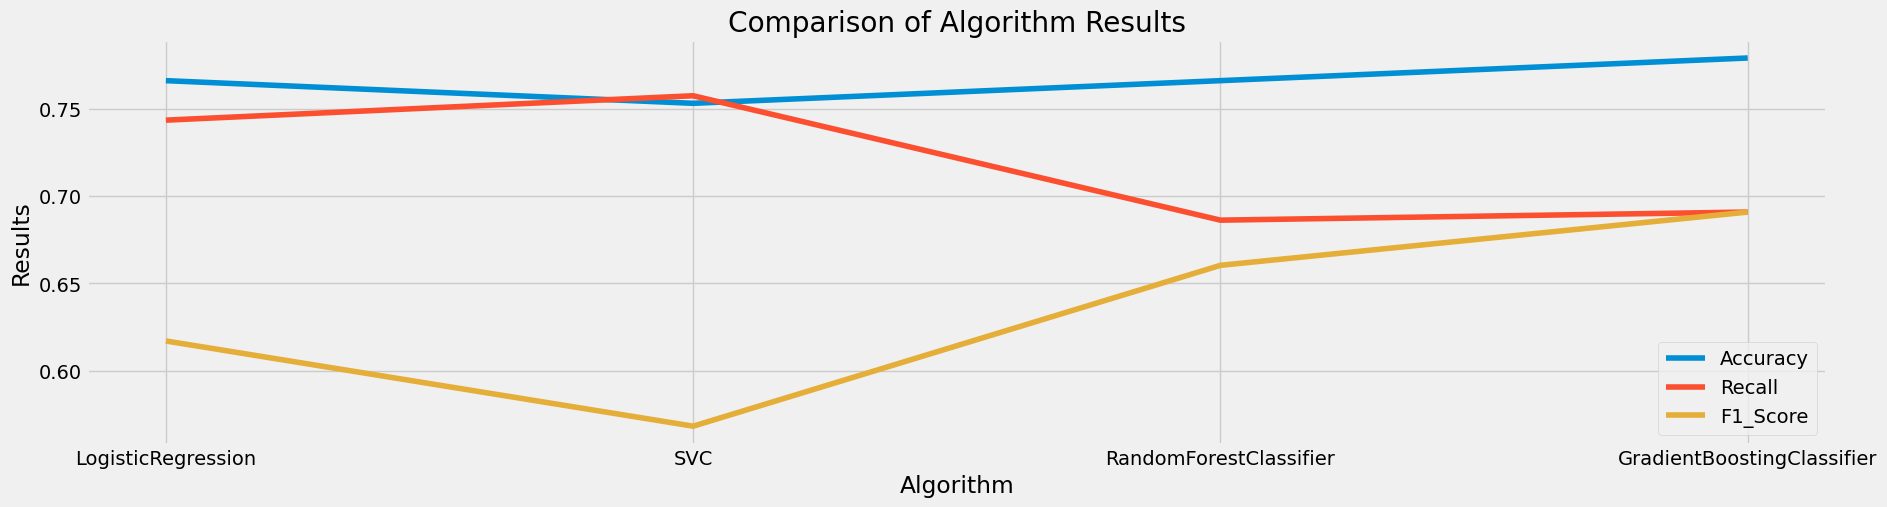

In [47]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.plot(FinalResult['Algorithm:'], result1, label='Accuracy')
plt.plot(FinalResult['Algorithm:'], result2, label='Recall')
plt.plot(FinalResult['Algorithm:'], result3, label='F1_Score')

plt.xlabel("Algorithm")
plt.ylabel("Results")
plt.title("Comparison of Algorithm Results")
plt.legend()

plt.show()

In [49]:
maxi=data[data['Outcome']==0]
mini=data[data['Outcome']==1]
maxi.shape, mini.shape

((500, 9), (268, 9))

Data imbalance handle

In [66]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [59]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)

In [67]:
print('old dataset shape{}'.format(Counter(y)))
print('new dataset shape{}'.format(Counter(y_res)))

old dataset shapeCounter({0: 500, 1: 268})
new dataset shapeCounter({1: 500, 0: 500})


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.2,random_state=41)

LogisticRegression()
accuracy is:  0.74 recall is:  0.78125 f1 score is:  0.7425742574257426


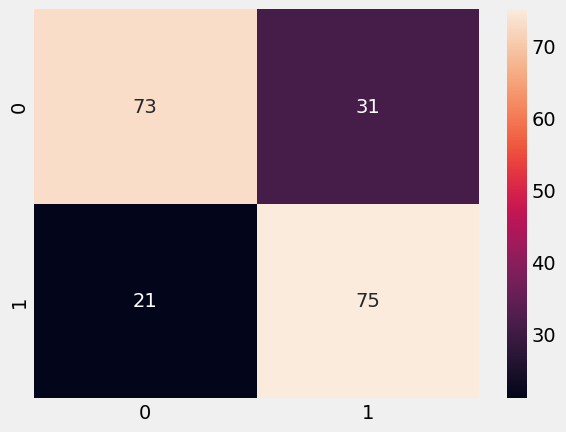

In [76]:
cal(model1)

SVC()
accuracy is:  0.69 recall is:  0.7291666666666666 f1 score is:  0.693069306930693


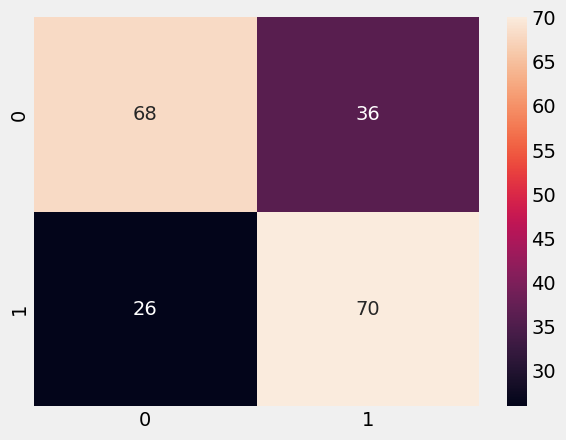

In [77]:
cal(model2)

RandomForestClassifier()
accuracy is:  0.875 recall is:  0.8648648648648649 f1 score is:  0.8847926267281107


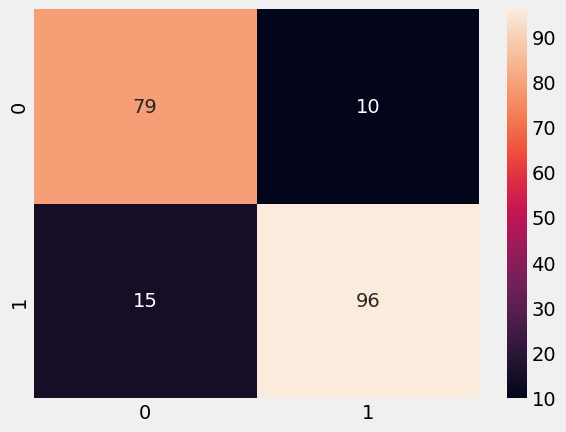

In [78]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is:  0.85 recall is:  0.8392857142857143 f1 score is:  0.8623853211009175


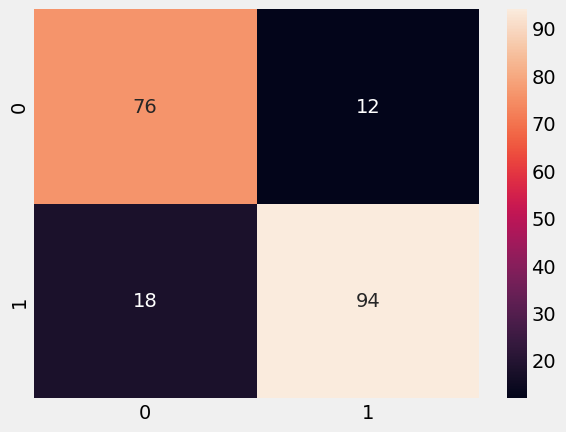

In [79]:
cal(model4)

RandomForestClassifier is the best

Using model to predict new data

In [82]:
import pickle

In [83]:
filename='Diabetes_prediction.sav'
pickle.dump(model3,open(filename,'wb'))